In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Data_Ikan_Baru/train')

In [ ]:
#bawal putih
import os
folder_path = ('/content/drive/MyDrive/Data_Ikan_Baru/train/Ikan Bawal Putih')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#belato
import os
folder_path = ('/content/drive/MyDrive/Data_Ikan_Baru/train/Ikan Belato')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Cakalang
import os
folder_path = ('/content/drive/MyDrive/Data_Ikan_Baru/train/Ikan Cakalang')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#gembolo
import os
folder_path = ('/content/drive/MyDrive/Data_Ikan_Baru/train/Ikan Gembolo')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#gole-gole
import os
folder_path = ('/content/drive/MyDrive/Data_Ikan_Baru/train/Ikan Gole Gole')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#kakap merah
import os
folder_path = ('/content/drive/MyDrive/Data_Ikan_Baru/train/Ikan Kakap Merah')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#kembung
import os
folder_path = ('/content/drive/MyDrive/Data_Ikan_Baru/train/Ikan Kembung')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#kerapu
import os
folder_path = ('/content/drive/MyDrive/Data_Ikan_Baru/train/Ikan Kerapu')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#tenggiri
import os
folder_path = ('/content/drive/MyDrive/Data_Ikan_Baru/train/Ikan Tenggiri')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#tuna
import os
folder_path = ('/content/drive/MyDrive/Data_Ikan_Baru/train/Ikan Tuna')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#cek label
from pathlib import Path
image_dir = Path('/content/drive/MyDrive/Data_Ikan_Baru/train')

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

In [ ]:
import pandas as pd
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

# Shuffle the DataFrame and reset index
image_df = image_df.sample(frac=1).reset_index(drop = True)

# Show the result
image_df.head(3)

Filepath             Label
0  /content/drive/MyDrive/Data_Ikan_Baru/train/Ik...      Ikan Kembung
1  /content/drive/MyDrive/Data_Ikan_Baru/train/Ik...  Ikan Bawal Putih
2  /content/drive/MyDrive/Data_Ikan_Baru/train/Ik...       Ikan Belato

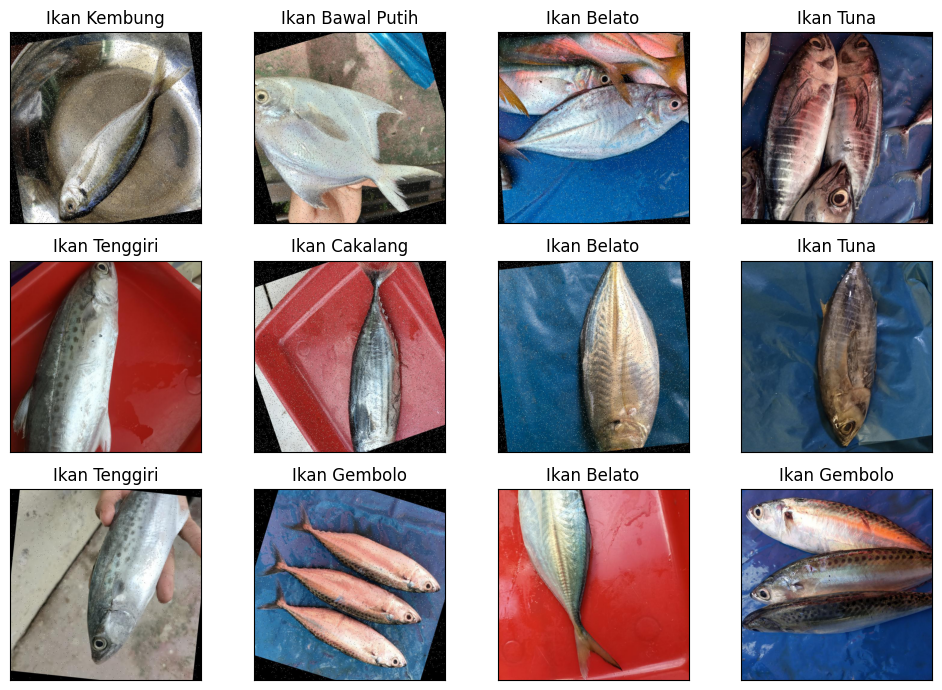

In [ ]:
# Display some pictures of the dataset with their labels
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[i]))
    ax.set_title(image_df.Label[i])
plt.tight_layout()
plt.show()

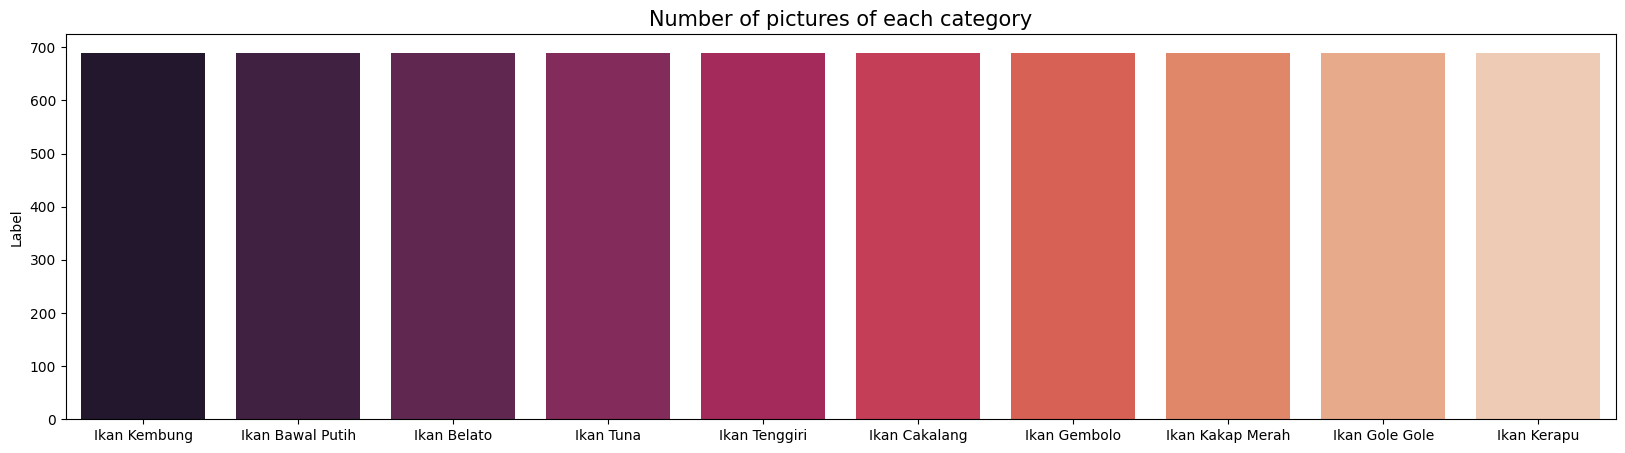

In [ ]:
# Display the number of pictures of each category
import seaborn as sns
vc = image_df['Label'].value_counts()
plt.figure(figsize=(20,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

In [ ]:
#Shuffle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
# Separate in train and test data
train_df, validasi_df = train_test_split(image_df, train_size=0.8, shuffle=True, random_state=1)

In [ ]:
#data generator
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_dataframe(dataframe=train_df,
                                          x_col='Filepath',
                                          y_col='Label',
                                         seed=0,
                                         target_size=(416,416),
                                         batch_size=16,
                                         shuffle=True,
                                         class_mode = 'categorical',
                                        subset='training',
                                         )

validasi_data = val_datagen.flow_from_dataframe(dataframe=validasi_df,
                                        x_col='Filepath',
                                        y_col='Label',
                                         seed=0,
                                         target_size=(416,416),
                                         batch_size=16,
                                         shuffle=False,
                                         class_mode = 'categorical',
                                         )

Found 5520 validated image filenames belonging to 10 classes.
Found 1380 validated image filenames belonging to 10 classes.


In [ ]:
from keras import Model, Input
input_shape = (416,416,3)
model_input = Input(shape=input_shape)

In [ ]:

from keras.applications.densenet import DenseNet201
from keras import layers
from keras import Model, Input
from tensorflow.keras.optimizers import RMSprop

from keras.callbacks import ReduceLROnPlateau, EarlyStopping

import torchvision.models as models
%matplotlib inline
import matplotlib.pyplot as plt


In [ ]:
denseNet = DenseNet201(input_shape=input_shape, input_tensor=model_input, include_top=False, weights="imagenet")

74836368/74836368 [==============================] - 0s 0us/step


In [ ]:

for layer in denseNet.layers:
    layer.trainable = False

In [ ]:
denseNet_last_layer = denseNet.get_layer('relu')
print('last layer output shape:', denseNet_last_layer.output_shape)
denseNet_last_output = denseNet_last_layer.output

last layer output shape: (None, 13, 13, 1920)


In [ ]:
# Flatten the output layer to 1 dimension
x_denseNet = layers.GlobalMaxPooling2D()(denseNet_last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x_denseNet = layers.Dense(512, activation='relu')(x_denseNet)
# Add a dropout rate of 0.7
x_denseNet = layers.Dropout(0.15)(x_denseNet)
# Add a final sigmoid layer for classification
x_denseNet = layers.Dense(10, activation='softmax')(x_denseNet)

# Configure and compile the model

denseNet_model = Model(model_input, x_denseNet)
optimizer = RMSprop(learning_rate=0.0001)
denseNet_model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
# denseNet_model.load_weights("DenseNetFull.h5")
# denseNet_model.DenseNet201(pretrained=True)
denseNet_model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 416, 416, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 422, 422, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 208, 208, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss') < 0.1 and logs.get('val_loss') < 0.1):
      print("\Stopped, Akurasi mencapai 98%")
      self.model.stop_training = True;

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Tentukan path penyimpanan model
checkpoint_path = '/content/drive/MyDrive/Percobaan-Desnet201-1/Desnet201-512-015.h5'

# Buat callback ModelCheckpoint
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path,
                                      monitor='val_loss',  # Metrik yang akan dipantau
                                      save_best_only=True,  # Hanya menyimpan model terbaik
                                      save_weights_only=False,  # Menyimpan seluruh model
                                      mode='min',  # Mode pemantauan (misalnya, 'min', 'max', atau 'auto')
                                      verbose=1)  # Menampilkan pesan saat menyimpan

In [ ]:
# desnet
callbacks= myCallback()
history_denseNet = denseNet_model.fit(
                  train_data,
                  validation_data=validasi_data,
                  steps_per_epoch=train_data.n/16,
                  validation_steps=validasi_data.n/16,
                  epochs=20,
                  callbacks=([callbacks],[checkpoint_callback]))

Epoch 1/20
345/345 [==============================] - ETA: 0s - loss: 0.1084 - accuracy: 0.9667
Epoch 1: loss did not improve from 0.10362
345/345 [==============================] - 341s 989ms/step - loss: 0.1084 - accuracy: 0.9667 - val_loss: 0.0452 - val_accuracy: 0.9841
Epoch 2/20
345/345 [==============================] - ETA: 0s - loss: 0.1059 - accuracy: 0.9645
Epoch 2: loss did not improve from 0.10362
345/345 [==============================] - 337s 976ms/step - loss: 0.1059 - accuracy: 0.9645 - val_loss: 0.0574 - val_accuracy: 0.9826
Epoch 3/20
345/345 [==============================] - ETA: 0s - loss: 0.1164 - accuracy: 0.9618
Epoch 3: loss did not improve from 0.10362
345/345 [==============================] - 337s 978ms/step - loss: 0.1164 - accuracy: 0.9618 - val_loss: 0.0919 - val_accuracy: 0.9652
Epoch 4/20
345/345 [==============================] - ETA: 0s - loss: 0.1056 - accuracy: 0.9647
Epoch 4: loss did not improve from 0.10362
345/345 [==============================

In [ ]:
#plotting
import matplotlib.pyplot as plt
def display_training_curves(training, validation, title, subplot):

    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

<ipython-input-32-c272c2965b67>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(subplot)


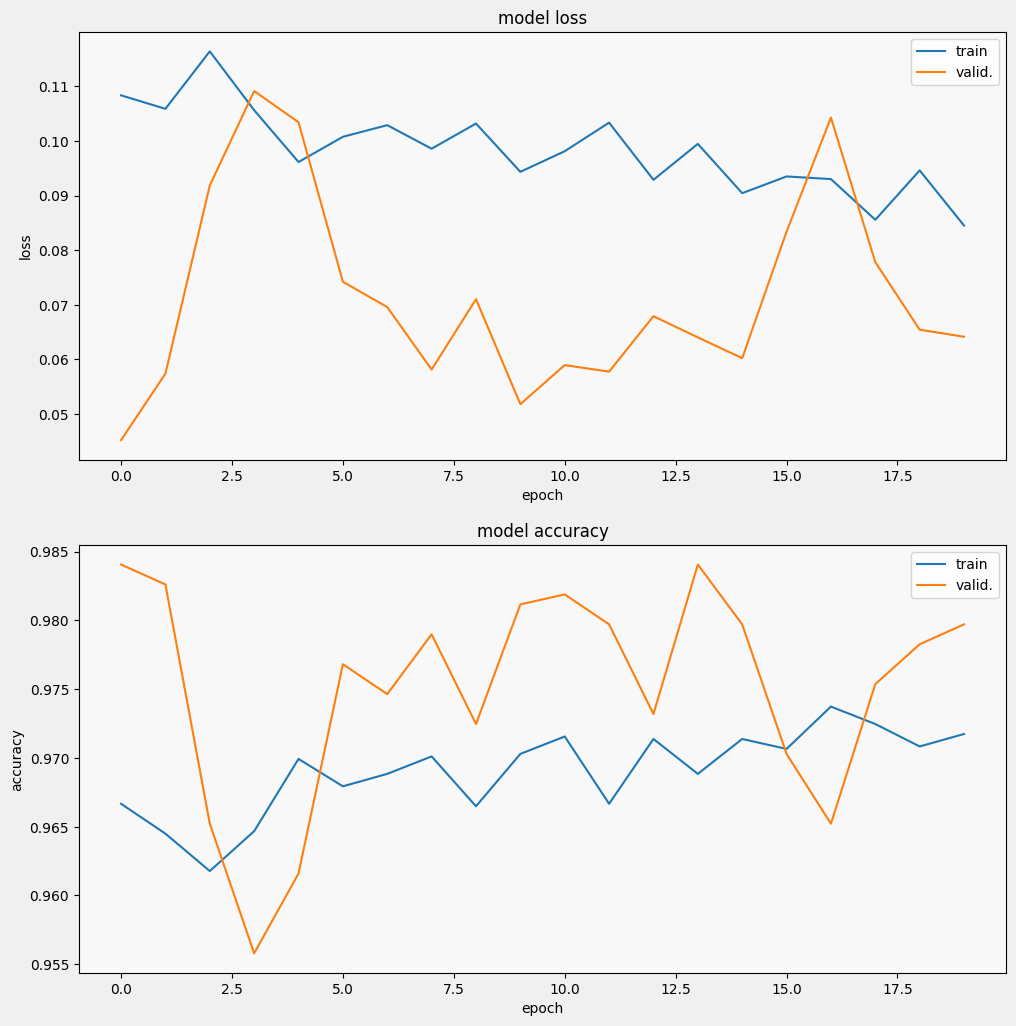

In [ ]:
#display
display_training_curves(
    history_denseNet.history['loss'],
    history_denseNet.history['val_loss'],
    'loss', 211)
display_training_curves(
    history_denseNet.history['accuracy'],
    history_denseNet.history['val_accuracy'],
    'accuracy', 212)

# Evaluation dan Prediction

In [ ]:
# Predict the label of the test_images
import numpy as np
pred = denseNet_model.predict(validasi_data)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_data.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 10 predictions: {pred[:10]}')

87/87 [==============================] - 24s 271ms/step
The first 10 predictions: ['Ikan Bawal Putih', 'Ikan Tenggiri', 'Ikan Bawal Putih', 'Ikan Tenggiri', 'Ikan Gembolo', 'Ikan Kembung', 'Ikan Belato', 'Ikan Kembung', 'Ikan Cakalang', 'Ikan Gembolo']


In [ ]:
#classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_test = list(validasi_df.Label)
print(classification_report(y_test, pred))

                  precision    recall  f1-score   support

Ikan Bawal Putih       0.99      0.99      0.99       146
     Ikan Belato       0.91      0.99      0.95       135
   Ikan Cakalang       1.00      0.97      0.99       145
    Ikan Gembolo       0.98      0.99      0.99       127
  Ikan Gole Gole       0.98      0.99      0.99       131
Ikan Kakap Merah       1.00      0.98      0.99       150
    Ikan Kembung       0.98      0.94      0.96       149
     Ikan Kerapu       0.98      1.00      0.99       116
   Ikan Tenggiri       0.99      0.97      0.98       141
       Ikan Tuna       0.97      0.98      0.98       140

        accuracy                           0.98      1380
       macro avg       0.98      0.98      0.98      1380
    weighted avg       0.98      0.98      0.98      1380



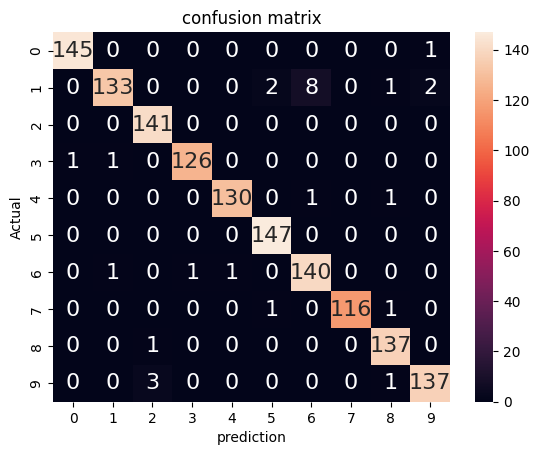

In [ ]:
import seaborn as sns
import pandas as pd
cm  = confusion_matrix(pred,y_test)
df_cm = pd.DataFrame(cm, index = [i for i in range(10)],
                  columns = [i for i in range(10)])
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.title('confusion matrix')
plt.xlabel('prediction')
plt.ylabel('Actual');

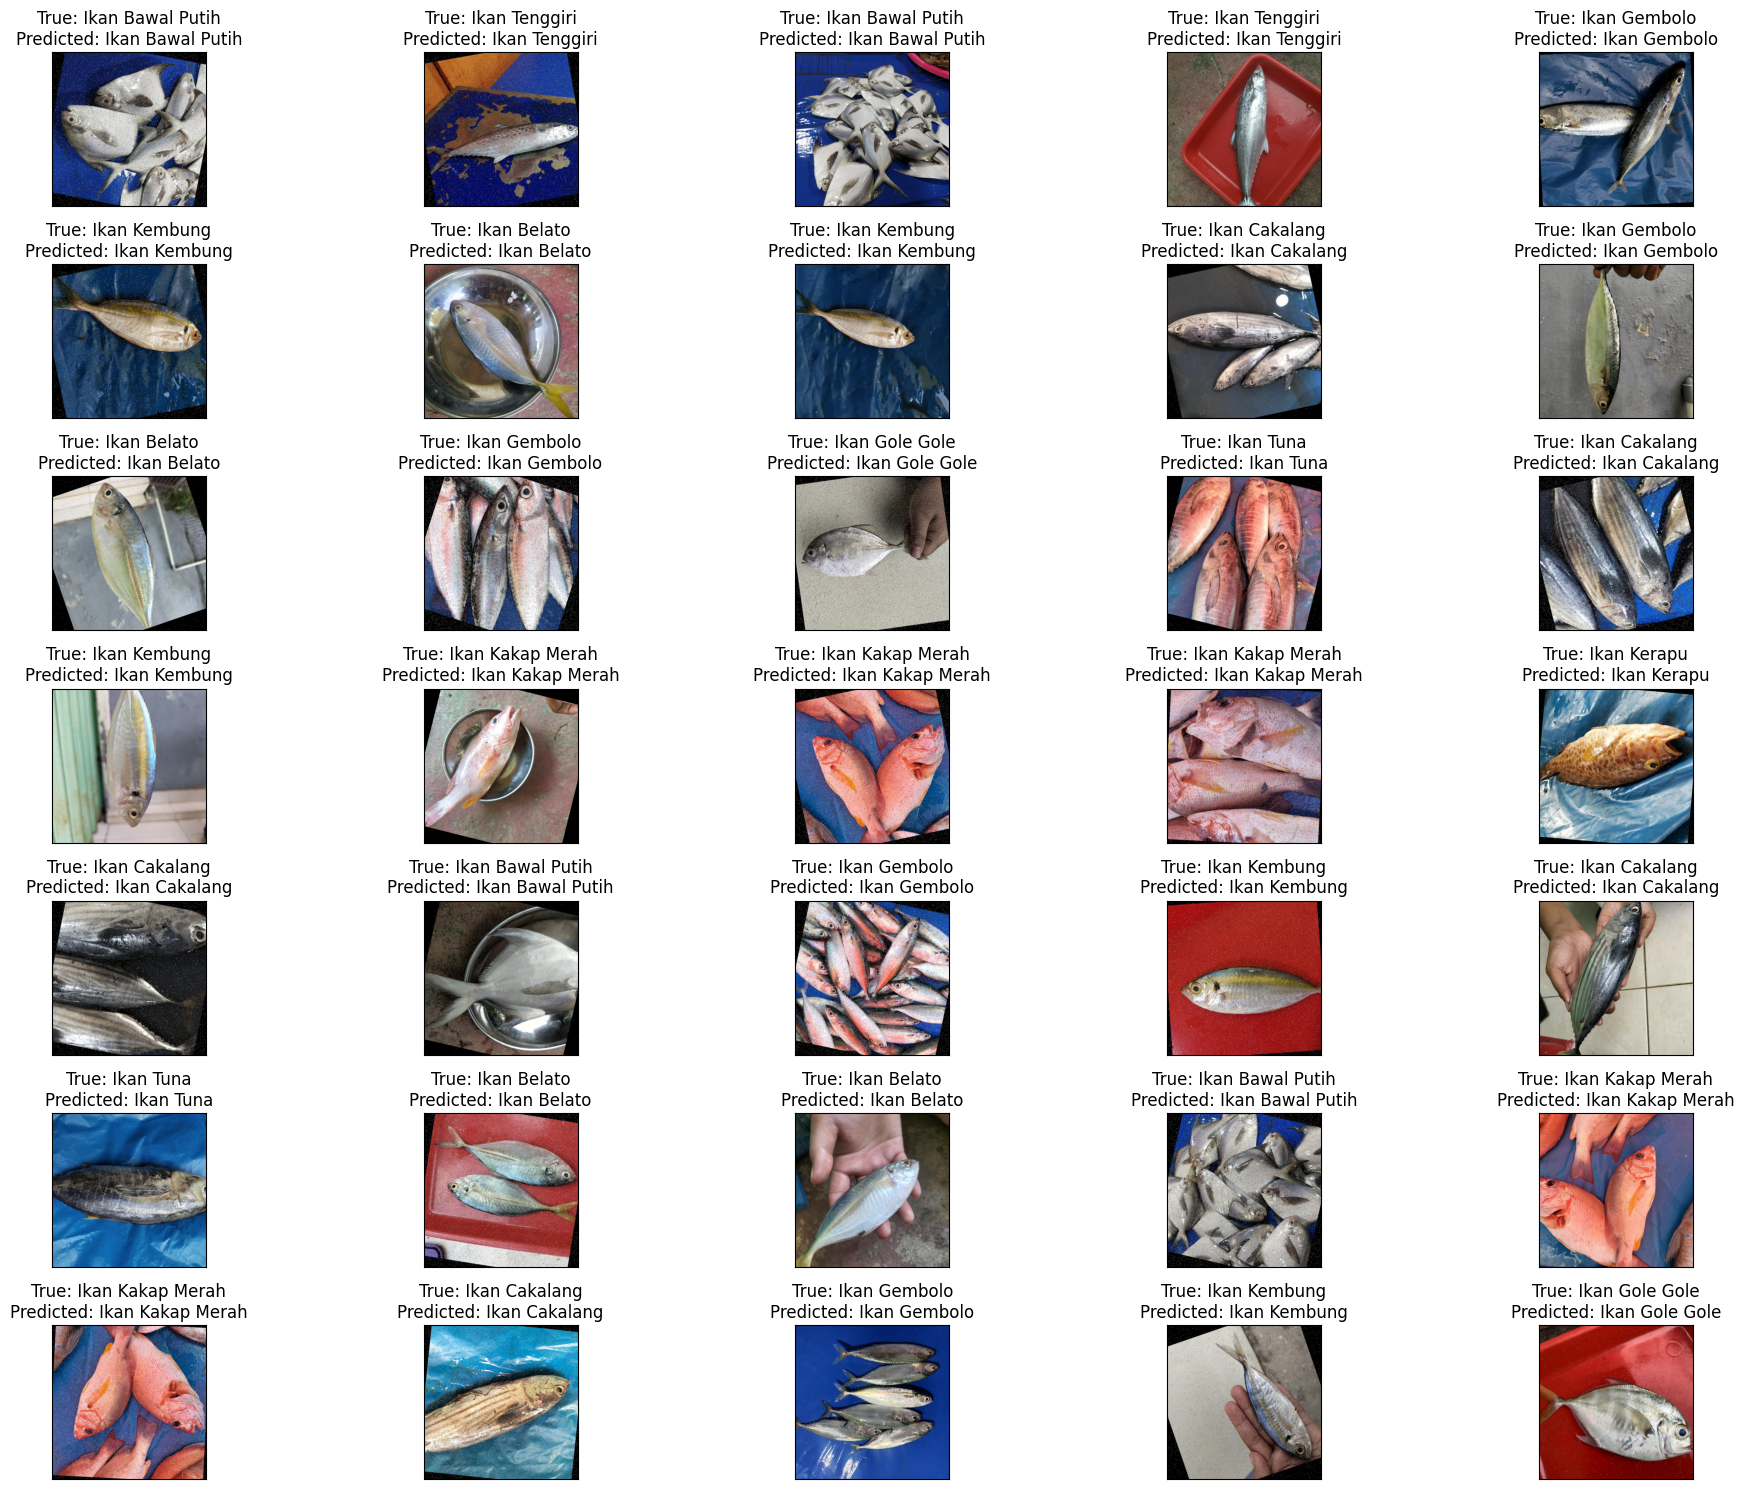

In [ ]:
# Display some pictures of the dataset with their labels and the predictions
fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(20, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(validasi_df.Filepath.iloc[i]))
    ax.set_title(f"True: {validasi_df.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

# Load Model

In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss') < 0.07 and logs.get('val_loss') < 0.1):
      print("\Stopped, Akurasi mencapai 98%")
      self.model.stop_training = True;

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Tentukan path penyimpanan model
checkpoint_path = '/content/drive/MyDrive/Percobaan-Desnet201-1/Desnet201-512-015.h5'

# Buat callback ModelCheckpoint
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path,
                                      monitor='loss',  # Metrik yang akan dipantau
                                      save_best_only=True,  # Hanya menyimpan model terbaik
                                      save_weights_only=False,  # Menyimpan seluruh model
                                      mode='min',  # Mode pemantauan (misalnya, 'min', 'max', atau 'auto')
                                      verbose=1)  # Menampilkan pesan saat menyimpan

In [ ]:
from tensorflow.keras.models import load_model
denseNet_model = load_model(checkpoint_path)

In [ ]:
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(learning_rate=0.0001)
denseNet_model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:

MODEL_BASE_PATH = "/content/drive/MyDrive"
PROJECT_NAME = "Percobaan-Desnet201-1"
SAVE_MODEL_NAME = "Final(26-5-23 : 09 AM)-Desnet201-512-015.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)
if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:
    os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))

print('Saving Model At {}...'.format(save_model_path))
denseNet_model.save(save_model_path,include_optimizer=False)

Saving Model At /content/drive/MyDrive/Percobaan-Desnet201-1/Final(26-5-23 : 09 AM)-Desnet201-512-015.h5...
